In [38]:
# Importation des bibliothèques Python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [39]:
# Importation des données
data = pd.read_csv("../data/card_credit_fraud_Classification project Final.csv")
data.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [40]:
data.shape

(1008213, 11)

In [41]:
data.dtypes

transactionId       int64
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

<AxesSubplot:ylabel='None'>

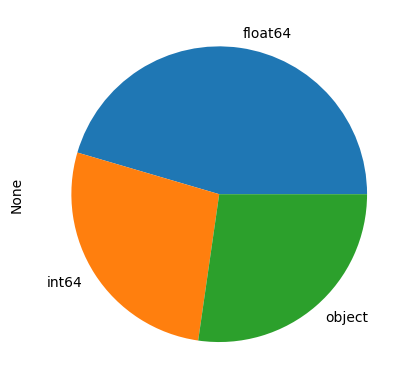

In [42]:
df = data.copy()

df.dtypes.value_counts().plot.pie()

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

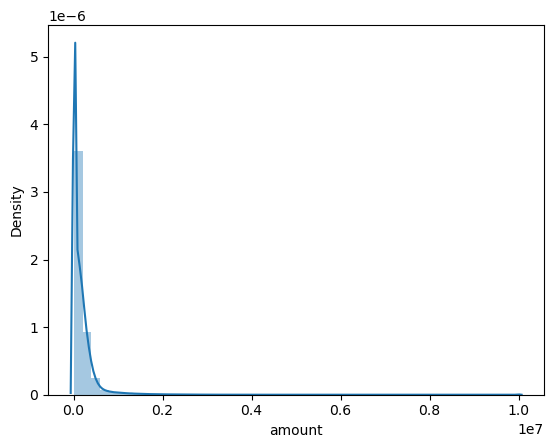

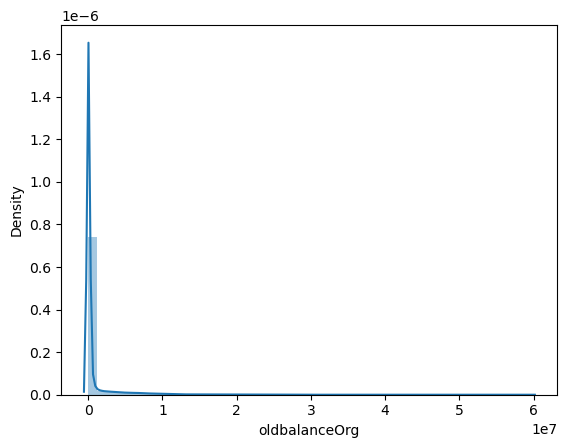

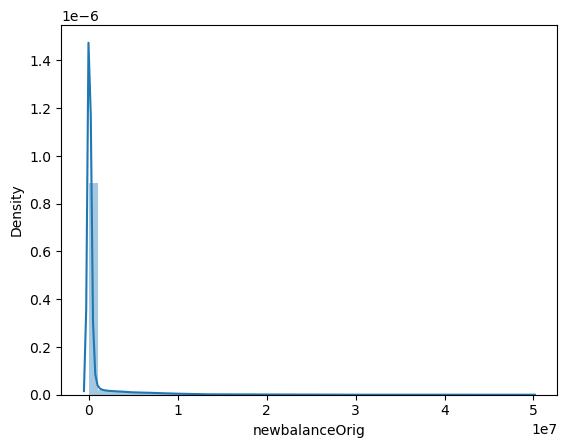

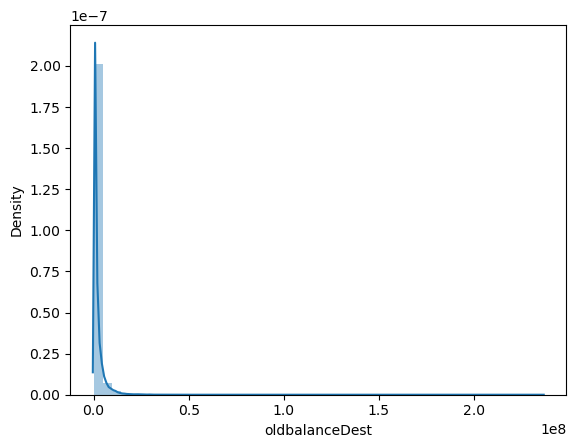

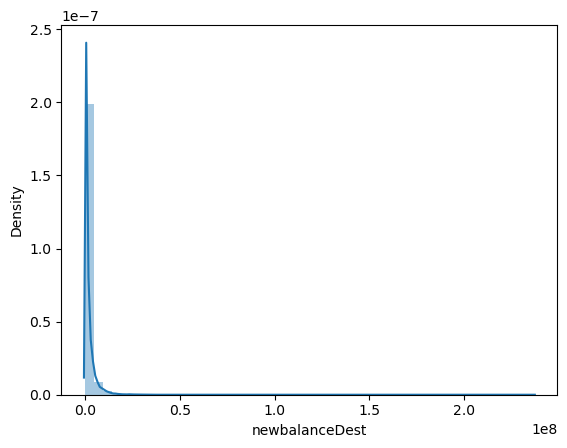

In [43]:
for col in df.select_dtypes('float'):
	plt.figure()
	sns.distplot(df[col])

<AxesSubplot:ylabel='type'>

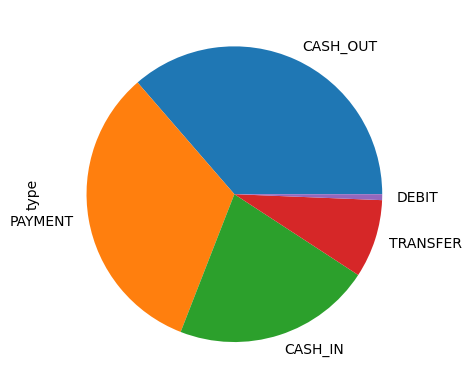

In [44]:
df["type"].value_counts().plot.pie()

In [45]:
for col in df.select_dtypes('object'):
	print(f'{col :-<50} {df[col].unique()}')

type---------------------------------------------- ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig------------------------------------------ ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest------------------------------------------ ['M1979787155' 'M2044282225' 'C553264065' ... 'C1881841831' 'C1365125890'
 'C2080388513']


<AxesSubplot:xlabel='type', ylabel='count'>

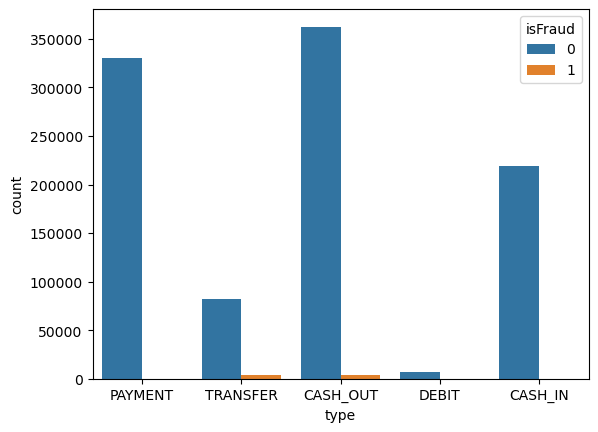

In [46]:
sns.countplot(x='type', hue='isFraud', data=df)

<AxesSubplot:xlabel='step', ylabel='count'>

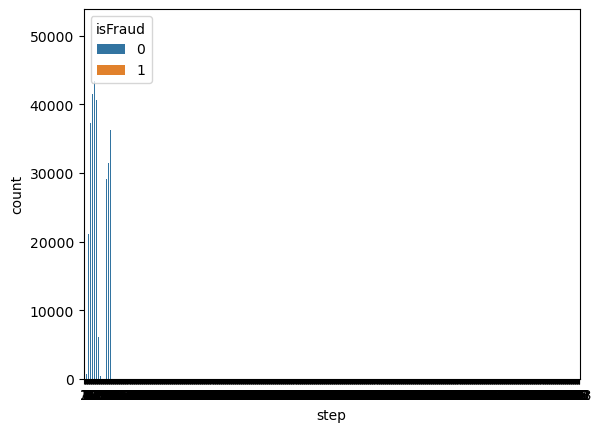

In [47]:
sns.countplot(x='step', hue='isFraud', data=df)

In [48]:
sns.pairplot(data=df)

Error in callback <function flush_figures at 0x0000021E017CA3A0> (for post_execute):


KeyboardInterrupt: 

# Tests d'application de l'algorithme Random Forest sur les données du dataset.

In [49]:
# Affichage du nombre de fraudes et de non-fraudes dans le dataset
print("Nombre de fraudes dans le dataset = {}".format((data['isFraud']==1).sum()))
print("Nombre de non-fraudes dans le dataset = {}".format((data['isFraud']==0).sum()))

Nombre de fraudes dans le dataset = 8213
Nombre de non-fraudes dans le dataset = 1000000


In [ ]:
# data.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [51]:
df_forest = data.copy()

code = {
    'PAYMENT':1,
    'TRANSFER':2,
    'CASH_OUT':3,
    'DEBIT':4,
    'CASH_IN':5,
}

df_forest['type'] = df_forest['type'].map(code)
df_forest = df_forest.drop(['nameOrig', 'nameDest'], axis=1)

In [52]:
df_forest.head()

,transactionId,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [53]:
df_forest.shape

(1008213, 9)

In [54]:
trainset, testset = train_test_split(df_forest, test_size=0.42, random_state=42)

In [55]:
trainset['isFraud'].value_counts()

0    579963
1      4800
Name: isFraud, dtype: int64

In [56]:
testset['isFraud'].value_counts()

0    420037
1      3413
Name: isFraud, dtype: int64

In [57]:
X_train = trainset.drop('isFraud', axis=1)
y_train = trainset['isFraud']

X_test = testset.drop('isFraud', axis=1)
y_test = testset['isFraud']

In [58]:
model = RandomForestClassifier(random_state=42)

In [59]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [60]:
def model_eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [61]:
model_eval(model, X_train, y_train, X_test, y_test)

[[420032      5]
 [    92   3321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    420037
           1       1.00      0.97      0.99      3413

    accuracy                           1.00    423450
   macro avg       1.00      0.99      0.99    423450
weighted avg       1.00      1.00      1.00    423450



Sur la matrice de confussion ci-dessus, on peut voir que sur un testset de 420037 valeurs que l'algorithme random forest a corectement détecté 420032 non-fraudes et 3321 fraudes mais il a identifier 5 fraudes comme non-fraudes et 92 non-fraudes comme non-fraudes.

On peut voir que la précision du modèle sur nos données est à 100%, que le rappel est à 99% et que le f1-score est à 99%.

In [62]:
df_forest['isFraud'].value_counts()

0    1000000
1       8213
Name: isFraud, dtype: int64

In [63]:
df_fraud = df_forest[df_forest['isFraud'] == 1]
df_notfraud = df_forest[df_forest['isFraud'] == 0]
df_fraud.shape # 8213 entries are frauds
# df_forest_notfraud.shape # 1000000 entries aren't frauds

(8213, 9)

In [64]:
# Création d'un nouveau dataframe qui contient au tant de fraudes (8213) que de non-fraudes à partir du dataset original
df_lim_nb_notfraud = df_notfraud.sample(n = 8213)
df_forest2 = pd.concat([df_lim_nb_notfraud, df_fraud])
df_forest2.shape

(16426, 9)

In [65]:
trainset, testset = train_test_split(df_forest2, test_size=0.2, random_state=0)

X_train = trainset.drop('isFraud', axis=1)
y_train = trainset['isFraud']

X_test = testset.drop('isFraud', axis=1)
y_test = testset['isFraud']

model_eval(model, X_train, y_train, X_test, y_test)

[[1628    2]
 [  21 1635]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1630
           1       1.00      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [66]:
df_forest2

,transactionId,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
521310,521310,20,3,16554.00,32889.00,16335.00,0.00,16554.00,0
665860,665860,36,2,895884.24,17.00,0.00,71231.53,1673435.04,0
885509,885509,42,3,198698.74,422634.00,223935.26,228806.79,427505.53,0
294996,294996,15,1,13422.82,390020.59,376597.77,0.00,0.00,0
873205,873205,42,1,60239.36,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
1008208,6362615,743,3,339682.13,339682.13,0.00,0.00,339682.13,1
1008209,6362616,743,2,6311409.28,6311409.28,0.00,0.00,0.00,1
1008210,6362617,743,3,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
1008211,6362618,743,2,850002.52,850002.52,0.00,0.00,0.00,1


In [67]:
df_forest3 = df_forest2.drop(['transactionId', 'oldbalanceOrg',
                             'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

trainset, testset = train_test_split(df_forest3, test_size=0.2, random_state=42)

X_train = trainset.drop('isFraud', axis=1)
y_train = trainset['isFraud']

X_test = testset.drop('isFraud', axis=1)
y_test = testset['isFraud']

model_eval(model, X_train, y_train, X_test, y_test)

[[1631   18]
 [  42 1595]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1649
           1       0.99      0.97      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286



In [68]:
df_forest4 = df_forest.drop(['transactionId', 'oldbalanceOrg',
                             'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

df_forest4.shape

trainset, testset = train_test_split(df_forest4, test_size=0.42, random_state=42)

X_train = trainset.drop('isFraud', axis=1)
y_train = trainset['isFraud']

X_test = testset.drop('isFraud', axis=1)
y_test = testset['isFraud']

model_eval(model, X_train, y_train, X_test, y_test)

[[419961     76]
 [   169   3244]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    420037
           1       0.98      0.95      0.96      3413

    accuracy                           1.00    423450
   macro avg       0.99      0.98      0.98    423450
weighted avg       1.00      1.00      1.00    423450



# Application de GridSearchCV

In [69]:
# Importation de GridSearchCV
from sklearn.model_selection import GridSearchCV

In [81]:
# Application de GridSearchCV à df_forest4 qui est une copie de notre dataset original sans les colonnes : 
# - 'transactionId',
# - 'oldbalanceOrg',
# - 'newbalanceOrig',
# - 'oldbalanceDest',
# - 'newbalanceDest'

pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV((RandomForestClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9995586258883274
max_samples: 0.6
max_features: 0.2


### **Importation et utilisation de la méthode SMOTE**

In [70]:
# préparation du  dataset pour l'application de SMOTE
df_forest_sm = df_forest.drop(['transactionId', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
# Séparation du dataset en features et targets
X = df_forest_sm.drop('isFraud', axis=1)
y = df_forest_sm['isFraud']

# Importation de SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42) 
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.90)

# Evaluation du model après utilisation de SMOTE
model_eval(model, X_res, y_res, X_test, y_test)